In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [19]:
# Hotel and Happiness Merged: Hotel inkl. Country Codes (hotel shape war: 119390 rows × 32 columns, jetzt plus 5 Spalten für Country Codes Merge) plus Happiness Data
df = pd.read_csv("C:/Users/jkr/Documents/9 Computer/Informatik/Techlabs/DataScienceTrack/Project_DS_2/TechsLabTeam2/Data/Edited/Happiness_and_Hotel_Combined.csv", encoding="ISO-8859-1")

display(df)


C:\Users\jkr\AppData\Local\Temp\ipykernel_7940\4199799819.py:2: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("C:/Users/jkr/Documents/9 Computer/Informatik/Techlabs/DataScienceTrack/Project_DS_2/TechsLabTeam2/Data/Edited/Happiness_and_Hotel_Combined.csv", encoding="ISO-8859-1")


,iso2,iso3,iso_num,country_x,Country,hotel,is_canceled,lead_time,Year,arrival_date_month,...,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,total_guests
0,PT,PRT,620.0,Portugal,Portugal,Resort Hotel,0,342,2015,July,...,88.0,5.102,1.159910,1.139350,0.875190,0.514690,0.010780,0.137190,1.264620,2.0
1,PT,PRT,620.0,Portugal,Portugal,Resort Hotel,0,737,2015,July,...,88.0,5.102,1.159910,1.139350,0.875190,0.514690,0.010780,0.137190,1.264620,2.0
2,GB,GBR,826.0,United Kingdom of Great Britain and Northern I...,United Kingdom,Resort Hotel,0,7,2015,July,...,21.0,6.867,1.266370,1.285480,0.909430,0.596250,0.320670,0.519120,1.969940,1.0
3,GB,GBR,826.0,United Kingdom of Great Britain and Northern I...,United Kingdom,Resort Hotel,0,13,2015,July,...,21.0,6.867,1.266370,1.285480,0.909430,0.596250,0.320670,0.519120,1.969940,1.0
4,GB,GBR,826.0,United Kingdom of Great Britain and Northern I...,United Kingdom,Resort Hotel,0,14,2015,July,...,21.0,6.867,1.266370,1.285480,0.909430,0.596250,0.320670,0.519120,1.969940,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75006,BE,BEL,56.0,Belgium,Belgium,City Hotel,0,23,2017,August,...,17.0,6.891,1.463781,1.462313,0.818092,0.539771,0.251343,0.231503,2.124210,2.0
75007,FR,FRA,250.0,France,France,City Hotel,0,102,2017,August,...,31.0,6.442,1.430923,1.387777,0.844466,0.470222,0.172502,0.129762,2.005955,3.0
75008,DE,DEU,276.0,Germany,Germany,City Hotel,0,34,2017,August,...,16.0,6.951,1.487923,1.472520,0.798951,0.562511,0.276732,0.336269,2.015770,2.0
75009,GB,GBR,826.0,United Kingdom of Great Britain and Northern I...,United Kingdom,City Hotel,0,109,2017,August,...,19.0,6.714,1.441634,1.496460,0.805336,0.508190,0.265428,0.492774,1.704144,2.0


In [20]:
# war das schon ohne is canceld und so?
count_positive_or_nan = df["is_canceled"].apply(lambda x: x > 0 or pd.isna(x)).sum()

print("Anzahl der Zeilen größer als 0 oder NaN:", count_positive_or_nan)

#=> ja

Anzahl der Zeilen größer als 0 oder NaN: 0


In [21]:

# Frequenz an Ländern ohne is_canceled (Resort vs City)
freq_all = df["Country"].value_counts().reset_index()
freq_City = df[(df["hotel"] == "City Hotel")]["Country"].value_counts().reset_index()
freq_Resort = df[(df["hotel"] == "Resort Hotel")]["Country"].value_counts().reset_index()

#print(freq)
#print(freq_City)
#print(freq_Resort)

freq_all.columns = ["Country", "All_value_counts"]
display(freq_all)

#freq_df = df["country"].value_counts().reset_index()
freq_City.columns = ["Country", "City_value_counts"]
display(freq_City)

freq_Resort.columns = ["Country", "Resort_value_counts"]
display(freq_Resort)

,Country,All_value_counts
0,Portugal,20977
1,United Kingdom,9668
2,France,8468
3,Spain,6383
4,Germany,6067
...,...,...
158,Namibia,1
159,Seychelles,1
160,Madagascar,1
161,Anguilla,1


,Country,City_value_counts
0,Portugal,10793
1,France,7069
2,Germany,5010
3,United Kingdom,3746
4,Spain,3278
...,...,...
143,Guyana,1
144,Uganda,1
145,French Polynesia,1
146,Burkina Faso,1


,Country,Resort_value_counts
0,Portugal,10184
1,United Kingdom,5922
2,Spain,3105
3,Ireland,1734
4,France,1399
...,...,...
112,Zambia,1
113,Saudi Arabia,1
114,San Marino,1
115,Burundi,1


In [22]:
display(df[["Country", "Happiness Score"]])

,Country,Happiness Score
0,Portugal,5.102
1,Portugal,5.102
2,United Kingdom,6.867
3,United Kingdom,6.867
4,United Kingdom,6.867
...,...,...
75006,Belgium,6.891
75007,France,6.442
75008,Germany,6.951
75009,United Kingdom,6.714


C:\Users\jkr\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 130 (\x82) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jkr\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 147 (\x93) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


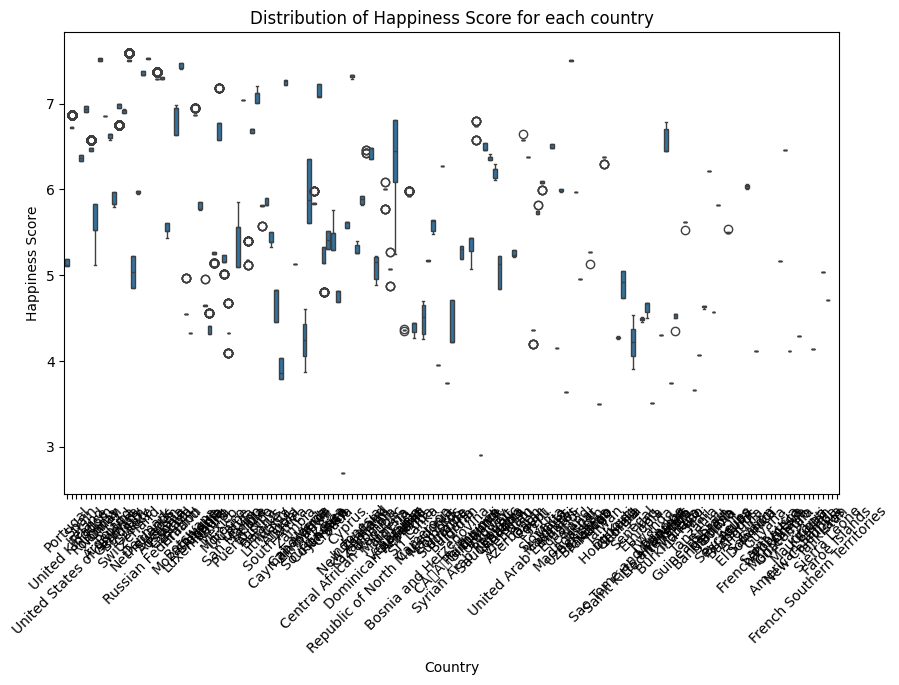

In [23]:
import seaborn as sns

# Boxplot zur Darstellung der Verteilung der numerischen Variable für jede Kategorie der kategorialen Variable
plt.figure(figsize=(10, 6))
sns.boxplot(x="Country", y="Happiness Score", data=df)
plt.xlabel("Country")
plt.ylabel("Happiness Score")
plt.title("Distribution of Happiness Score for each country")
plt.xticks(rotation=45)
plt.show()


C:\Users\jkr\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 130 (\x82) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jkr\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 147 (\x93) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


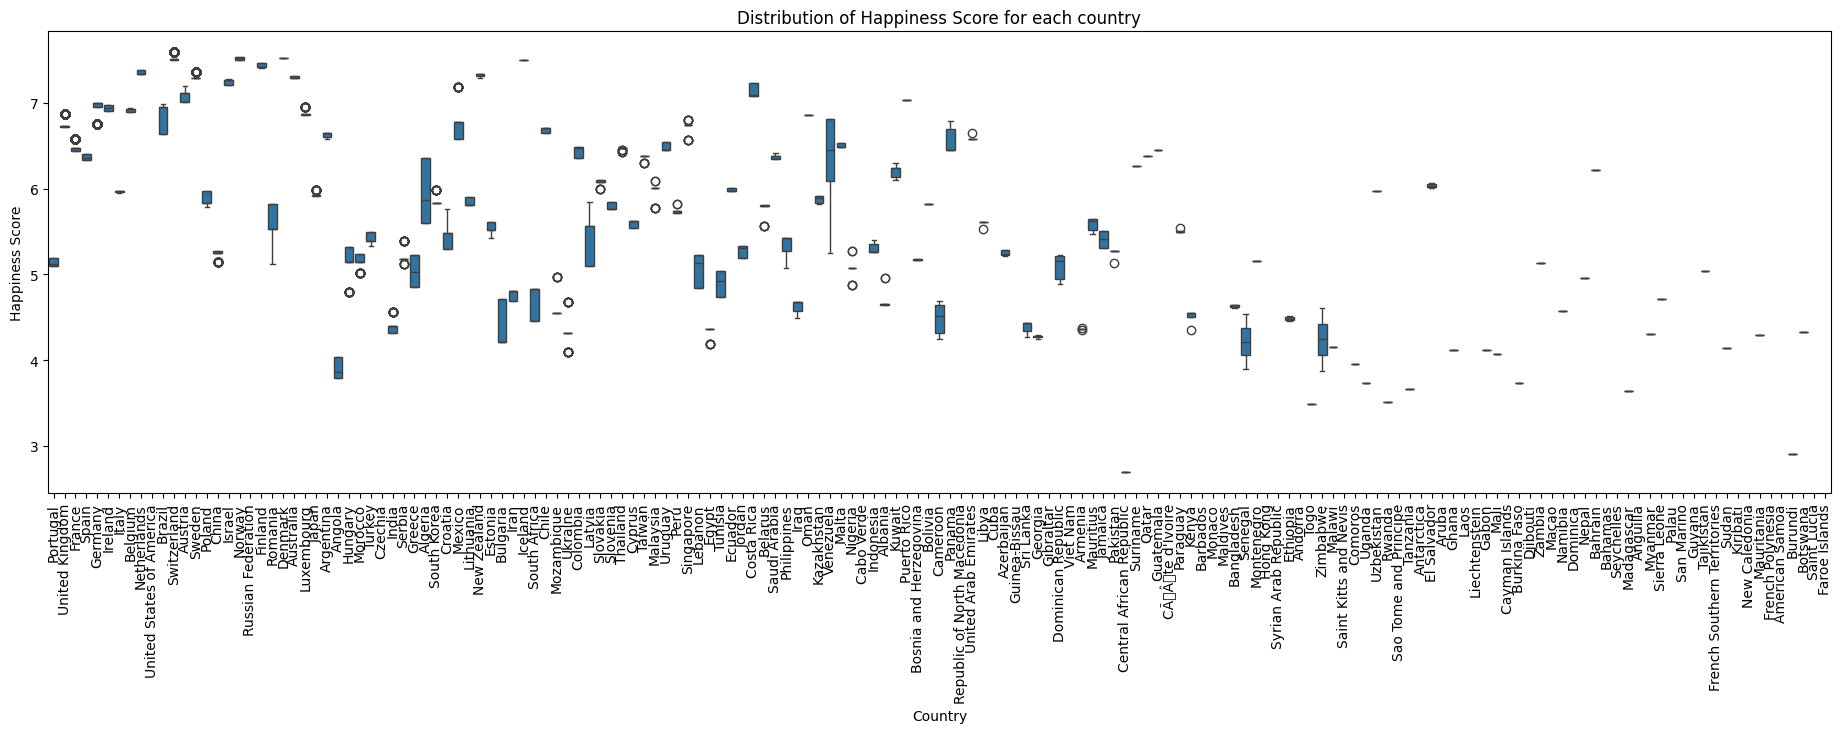

In [24]:
# sortiert nach Häufikeit der Länder
# Boxplot zur Darstellung der Verteilung der numerischen Variable für jede Kategorie der kategorialen Variable

import seaborn as sns
import matplotlib.pyplot as plt

# Zählen der Häufigkeit jeder Kategorie (Land)
country_counts = df['Country'].value_counts()

# Sortieren der Kategorien nach ihrer Häufigkeit
sorted_countries = country_counts.sort_values(ascending=False)

# Extrahieren der sortierten Ländernamen
sorted_country_names = sorted_countries.index

# Boxplot zur Darstellung der Verteilung der numerischen Variable für jede Kategorie der kategorialen Variable
plt.figure(figsize=(23, 6))
sns.boxplot(x="Country", y="Happiness Score", data=df, order=sorted_country_names)
plt.xlabel("Country")
plt.ylabel("Happiness Score")
plt.title("Distribution of Happiness Score for each country")
plt.xticks(rotation=90)
plt.show()


In [25]:
from scipy.stats import spearmanr

# Berechnung des Spearman-Rangkorrelationskoeffizienten
corr, p_value = spearmanr(sorted_countries.values, df.groupby('Country')['Happiness Score'].mean())

# Ausgabe der Korrelationskoeffizienten und des p-Werts
print("Spearman's correlation coefficient:", corr)
print("p-value:", p_value)


Spearman's correlation coefficient: nan
p-value: nan


Wenn der Spearman-Rangkorrelationskoeffizient und/oder der p-Wert NaN (Not a Number) sind, bedeutet dies, dass keine gültige Korrelationsanalyse durchgeführt werden konnte. Dies kann aus verschiedenen Gründen der Fall sein, darunter:

Eingeschränkter Datenbereich: Es gibt möglicherweise nicht genügend Datenpunkte, um eine sinnvolle Analyse durchzuführen. Wenn beispielsweise nur wenige Länder vorhanden sind oder wenn einige Länder nur einmal in den Daten vorkommen, könnte dies zu NaN-Werten führen.

Einschränkungen in den Daten: Es könnte fehlende oder unvollständige Daten in einer der Variablen geben, was die Berechnung der Korrelation beeinträchtigt.

Homogenität der Daten: Wenn die Häufigkeit der Länder und die Happiness Scores in den Daten sehr ähnlich sind (z. B. wenn alle Länder ähnliche Häufigkeiten und Scores haben), könnte dies zu einer Nichtberechnung der Korrelation führen, da keine Varianz in den Daten vorhanden ist.

Um dieses Problem genauer zu untersuchen, könntest du zunächst überprüfen, ob es fehlende oder ungewöhnliche Werte in den Daten gibt, und sicherstellen, dass genügend Datenpunkte vorhanden sind, um eine sinnvolle Analyse durchzuführen. Es könnte auch hilfreich sein, die Verteilung der Häufigkeit der Länder und der Happiness Scores zu visualisieren, um ein besseres Verständnis der Daten zu erhalten.

## Boxplot Länder gegen Häufigkeit, sortiert nach Frequenzen (ohne Länder die nur einmal vorkommen)

C:\Users\jkr\AppData\Local\Temp\ipykernel_7940\984397553.py:30: UserWarning: Glyph 130 (\x82) missing from current font.
  plt.savefig("Output\Figures\CountryHappinessBoxPlot.jpg", bbox_inches="tight", dpi=300)
C:\Users\jkr\AppData\Local\Temp\ipykernel_7940\984397553.py:30: UserWarning: Glyph 147 (\x93) missing from current font.
  plt.savefig("Output\Figures\CountryHappinessBoxPlot.jpg", bbox_inches="tight", dpi=300)
C:\Users\jkr\AppData\Local\Temp\ipykernel_7940\984397553.py:30: UserWarning: Glyph 130 (\x82) missing from current font.
  plt.savefig("Output\Figures\CountryHappinessBoxPlot.jpg", bbox_inches="tight", dpi=300)
C:\Users\jkr\AppData\Local\Temp\ipykernel_7940\984397553.py:30: UserWarning: Glyph 147 (\x93) missing from current font.
  plt.savefig("Output\Figures\CountryHappinessBoxPlot.jpg", bbox_inches="tight", dpi=300)
C:\Users\jkr\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 130 (\x82) missing from current font.
  fig.c

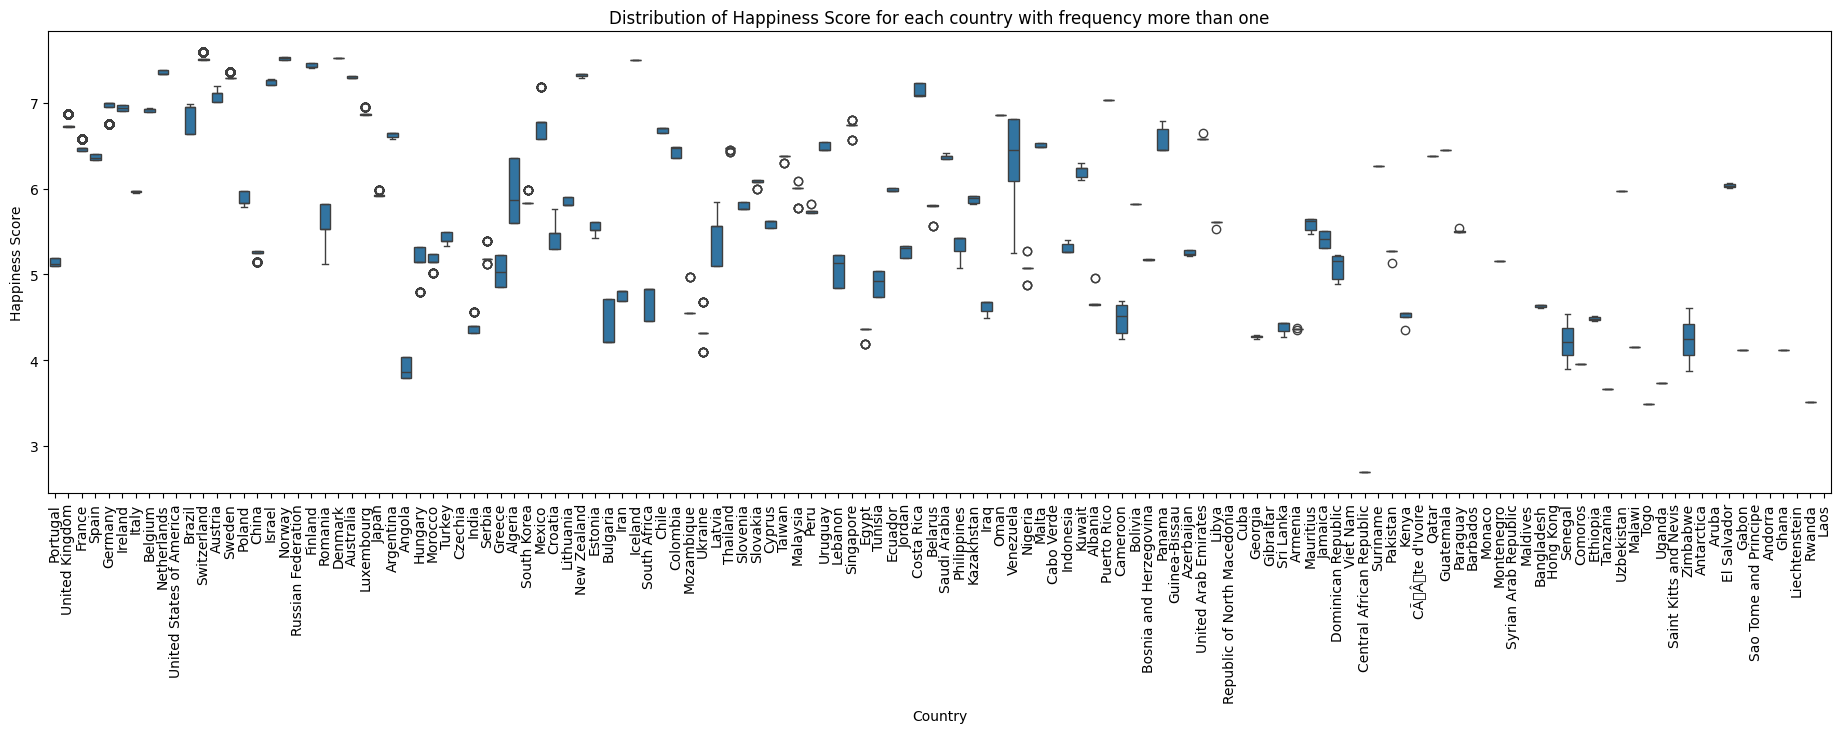

In [26]:
# entfernen der Countries, die nur ein mal vorkommen

import seaborn as sns
import matplotlib.pyplot as plt

# Zählen der Häufigkeit jeder Kategorie (Land)
country_counts = df['Country'].value_counts()

# Filtern der Länder, die häufiger als einmal vorkommen
frequent_countries = country_counts[country_counts > 1].index

# Filtern des DataFrame, um nur die Länder zu behalten, die häufiger als einmal vorkommen
df_filtered = df[df['Country'].isin(frequent_countries)]

# Sortieren der Kategorien nach ihrer Häufigkeit
sorted_countries = df_filtered['Country'].value_counts().sort_values(ascending=False)

# Extrahieren der sortierten Ländernamen
sorted_country_names = sorted_countries.index

# Boxplot zur Darstellung der Verteilung der numerischen Variable für jede Kategorie der kategorialen Variable
plt.figure(figsize=(23, 6))
sns.boxplot(x="Country", y="Happiness Score", data=df, order=sorted_country_names)
plt.xlabel("Country")
plt.ylabel("Happiness Score")
plt.title("Distribution of Happiness Score for each country with frequency more than one")
plt.xticks(rotation=90)

# Grafik speichern
plt.savefig("Output\Figures\CountryHappinessBoxPlot.jpg", bbox_inches="tight", dpi=300)

plt.show()


In [27]:
from scipy.stats import spearmanr

# Berechnung des Spearman-Rangkorrelationskoeffizienten
corr, p_value = spearmanr(sorted_countries.values, df_filtered.groupby('Country')['Happiness Score'].mean())

# Ausgabe der Korrelationskoeffizienten und des p-Werts
print("Spearman's correlation coefficient:", corr)
print("p-value:", p_value)

Spearman's correlation coefficient: nan
p-value: nan


Es sieht so aus, als ob das Problem weiterhin besteht, und wir sollten das genauer untersuchen. Die Berechnung des Spearman-Rangkorrelationskoeffizienten kann NaN-Werte zurückgeben, wenn es nicht genügend Varianz oder Datenpunkte gibt, um eine aussagekräftige Korrelationsanalyse durchzuführen.

Hier sind einige Schritte, die du ausführen könntest, um das Problem genauer zu diagnostizieren:

1. Überprüfe die Werte in sorted_countries.values und df_filtered.groupby('Country')['Happiness Score'].mean(), um sicherzustellen, dass sie gültige Werte enthalten und keine NaN-Werte oder fehlende Werte haben.

2. Überprüfe die Verteilung der Häufigkeit der Länder und der Happiness Scores, um sicherzustellen, dass genügend Varianz in den Daten vorhanden ist.

3. Stelle sicher, dass df_filtered nicht leer ist und genügend Datenpunkte für eine sinnvolle Korrelationsanalyse enthält.

4. Wenn du möchtest, könntest du auch versuchen, eine andere Korrelationsmethode zu verwenden, wie z.B. Pearson-Korrelation, um zu sehen, ob du ähnliche Ergebnisse erhältst.

Wenn trotzdem NaN-Werte zurückgegeben werden, könnte es sein, dass deine Daten einfach nicht ausreichend sind, um eine aussagekräftige Korrelationsanalyse durchzuführen. In solchen Fällen ist es wichtig, die Grenzen deiner Daten zu erkennen und ihre Interpretation entsprechend anzupassen.

In [28]:
# Test Punkt 1
#Überprüfe die Werte in sorted_countries.values und df_filtered.groupby('Country')['Happiness Score'].mean(),
#um sicherzustellen, dass sie gültige Werte enthalten und keine NaN-Werte oder fehlende Werte haben. 

print("Werte in sorted_countries.values:")
print(sorted_countries.values)

print("Gruppierte Durchschnittswerte der Happiness Scores:")
print(df_filtered.groupby('Country')['Happiness Score'].mean())

Werte in sorted_countries.values:
[20977  9668  8468  6383  6067  2542  2428  1868  1716  1592  1392  1298
  1033   793   703   537   500   426   391   377   366   326   319   177
   169   160   157   153   150   146   134   116    98    93    82    78
    75    75    74    68    65    63    59    53    49    49    48    48
    48    46    41    41    41    40    37    25    23    23    22    22
    21    20    19    18    18    17    15    15    14    14    14    14
    13    13    12    11    10    10    10    10    10    10     9     8
     8     8     8     8     8     7     7     7     6     6     6     6
     6     5     5     5     4     4     4     4     4     4     3     3
     3     3     3     3     3     2     2     2     2     2     2     2
     2     2     2     2     2     2     2     2     2     2     2     2]
Gruppierte Durchschnittswerte der Happiness Scores:
Country
Albania       4.711400
Algeria       5.993500
Andorra            NaN
Angola        3.890510
Antarctica

In [29]:
#Im Code werden zuerst die Durchschnittswerte der Happiness Scores gruppiert und NaN-Werte entfernt.
#Dann werden die Länder und ihre Häufigkeiten sortiert.
#Da der Spearman-Korrelationskoeffizient nur zwischen zwei gleich langen Arrays berechnet werden kann,
#werden nur die Länder berücksichtigt, die in den gruppierten, bereinigten Durchschnittswerten vorhanden sind.
#Schließlich wird der Spearman-Rangkorrelationskoeffizient berechnet und ausgegeben.

from scipy.stats import spearmanr

# Gruppierte Durchschnittswerte der Happiness Scores berechnen
grouped_scores = df_filtered.groupby('Country')['Happiness Score'].mean()

# NaN-Werte entfernen
grouped_scores_cleaned = grouped_scores.dropna()

# Sortierte Länder und deren Häufigkeiten erhalten
country_counts = df_filtered['Country'].value_counts()
sorted_countries = country_counts.sort_values(ascending=False)

# Nur die Länder berücksichtigen, die in grouped_scores_cleaned vorhanden sind
sorted_countries_common = sorted_countries.loc[grouped_scores_cleaned.index]

# Berechnung des Spearman-Rangkorrelationskoeffizienten
corr, p_value = spearmanr(sorted_countries_common.values, grouped_scores_cleaned)

# Ausgabe der Korrelationskoeffizienten und des p-Werts
print("Spearman's correlation coefficient:", corr)
print("p-value:", p_value)


Spearman's correlation coefficient: 0.5301287214183811
p-value: 2.5848279356853353e-09


Ein Spearman-Korrelationskoeffizient von 0,53 deutet auf eine moderate bis starke positive Korrelation zwischen der Häufigkeit der Länder und den Happiness Scores hin. Der sehr kleine p-Wert (2.58e-09) zeigt an, dass diese Korrelation statistisch signifikant ist, was bedeutet, dass die Wahrscheinlichkeit, eine solch starke Korrelation rein zufällig zu erhalten, äußerst gering ist.

In anderen Worten bedeutet das, dass Länder mit höheren Happiness Scores tendenziell häufiger vertreten sind, während Länder mit niedrigeren Happiness Scores tendenziell seltener vertreten sind.

C:\Users\jkr\AppData\Local\Temp\ipykernel_7940\3753312024.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  grouped_scores_common_filtered = [grouped_scores_common[i] for i, country in enumerate(common_countries) if country in common_countries_filtered]


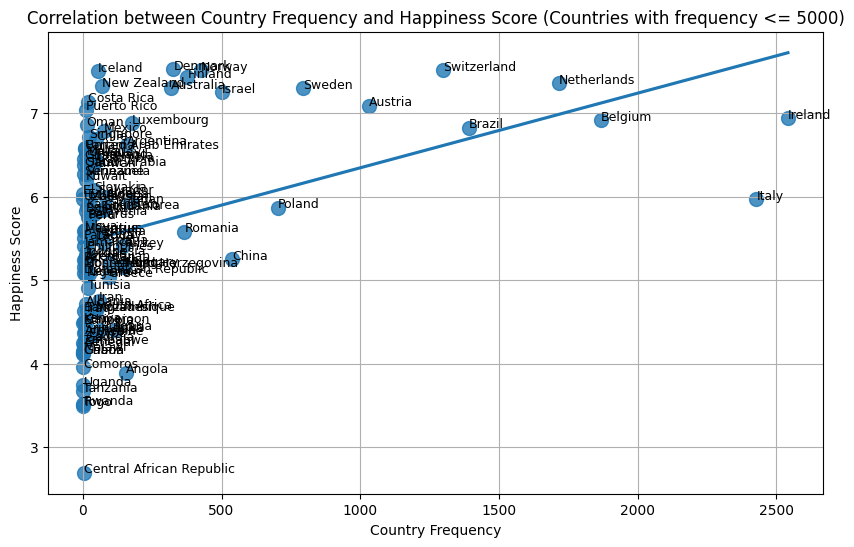

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# Annahme: sorted_countries_common ist bereits definiert
common_countries = sorted_countries_common.index.tolist()

# Annahme: grouped_scores ist bereits definiert
grouped_scores_common = grouped_scores_cleaned.loc[common_countries]


# Filtern der Länder mit einer Häufigkeit von bis zu 5000
common_countries_filtered = [country for country in common_countries if sorted_countries[country] <= 5000]
sorted_countries_common_filtered = [sorted_countries[country] for country in common_countries_filtered]
grouped_scores_common_filtered = [grouped_scores_common[i] for i, country in enumerate(common_countries) if country in common_countries_filtered]

# Scatterplot mit Trendlinie erstellen
plt.figure(figsize=(10, 6))
sns.regplot(x=sorted_countries_common_filtered, y=grouped_scores_common_filtered, scatter_kws={"s": 100}, ci=None)
plt.xlabel("Country Frequency")
plt.ylabel("Happiness Score")
plt.title("Correlation between Country Frequency and Happiness Score (Countries with frequency <= 5000)")
plt.grid(True)

# Punkte beschriften
for i, country in enumerate(common_countries_filtered):
    plt.text(sorted_countries_common_filtered[i], grouped_scores_common_filtered[i], country, fontsize=9)

# Grafik speichern
plt.savefig("Output\Figures\CountryHappinessScatter5000.jpg", bbox_inches="tight", dpi=300)

plt.show()


C:\Users\jkr\AppData\Local\Temp\ipykernel_7940\1197013568.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(sorted_countries_common[i], grouped_scores_common[i], country, fontsize=9)


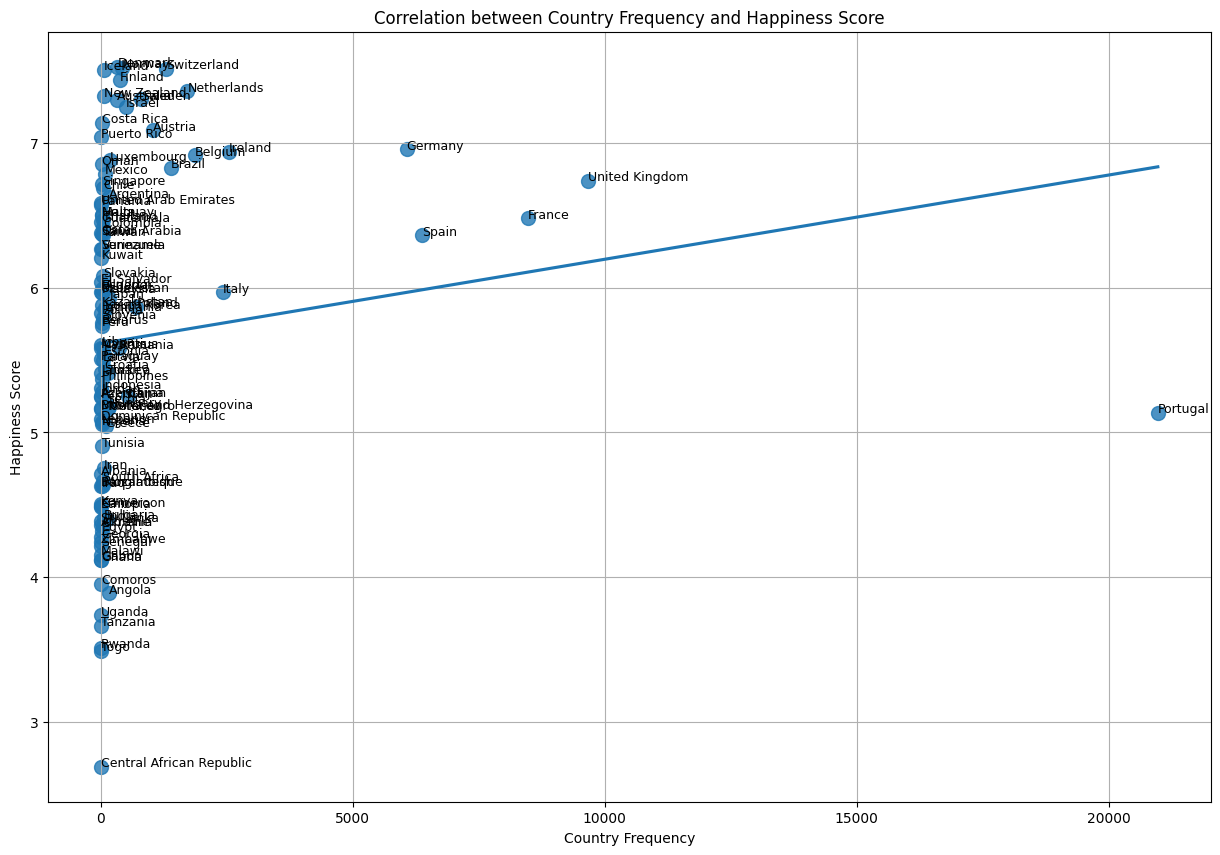

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatterplot mit Trendlinie erstellen
plt.figure(figsize=(15, 10))
sns.regplot(x=sorted_countries_common, y=grouped_scores_common, scatter_kws={"s": 100}, ci=None)
plt.xlabel("Country Frequency")
plt.ylabel("Happiness Score")
plt.title("Correlation between Country Frequency and Happiness Score")
plt.grid(True)

# Punkte beschriften
for i, country in enumerate(common_countries):
    plt.text(sorted_countries_common[i], grouped_scores_common[i], country, fontsize=9)

# Grafik speichern
plt.savefig("Output\Figures\CountryHappinessScatterAll.jpg", bbox_inches="tight", dpi=300)

plt.show()


C:\Users\jkr\AppData\Local\Temp\ipykernel_7940\369653805.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(sorted_countries_common[i], grouped_scores_common[i], country, fontsize=9)


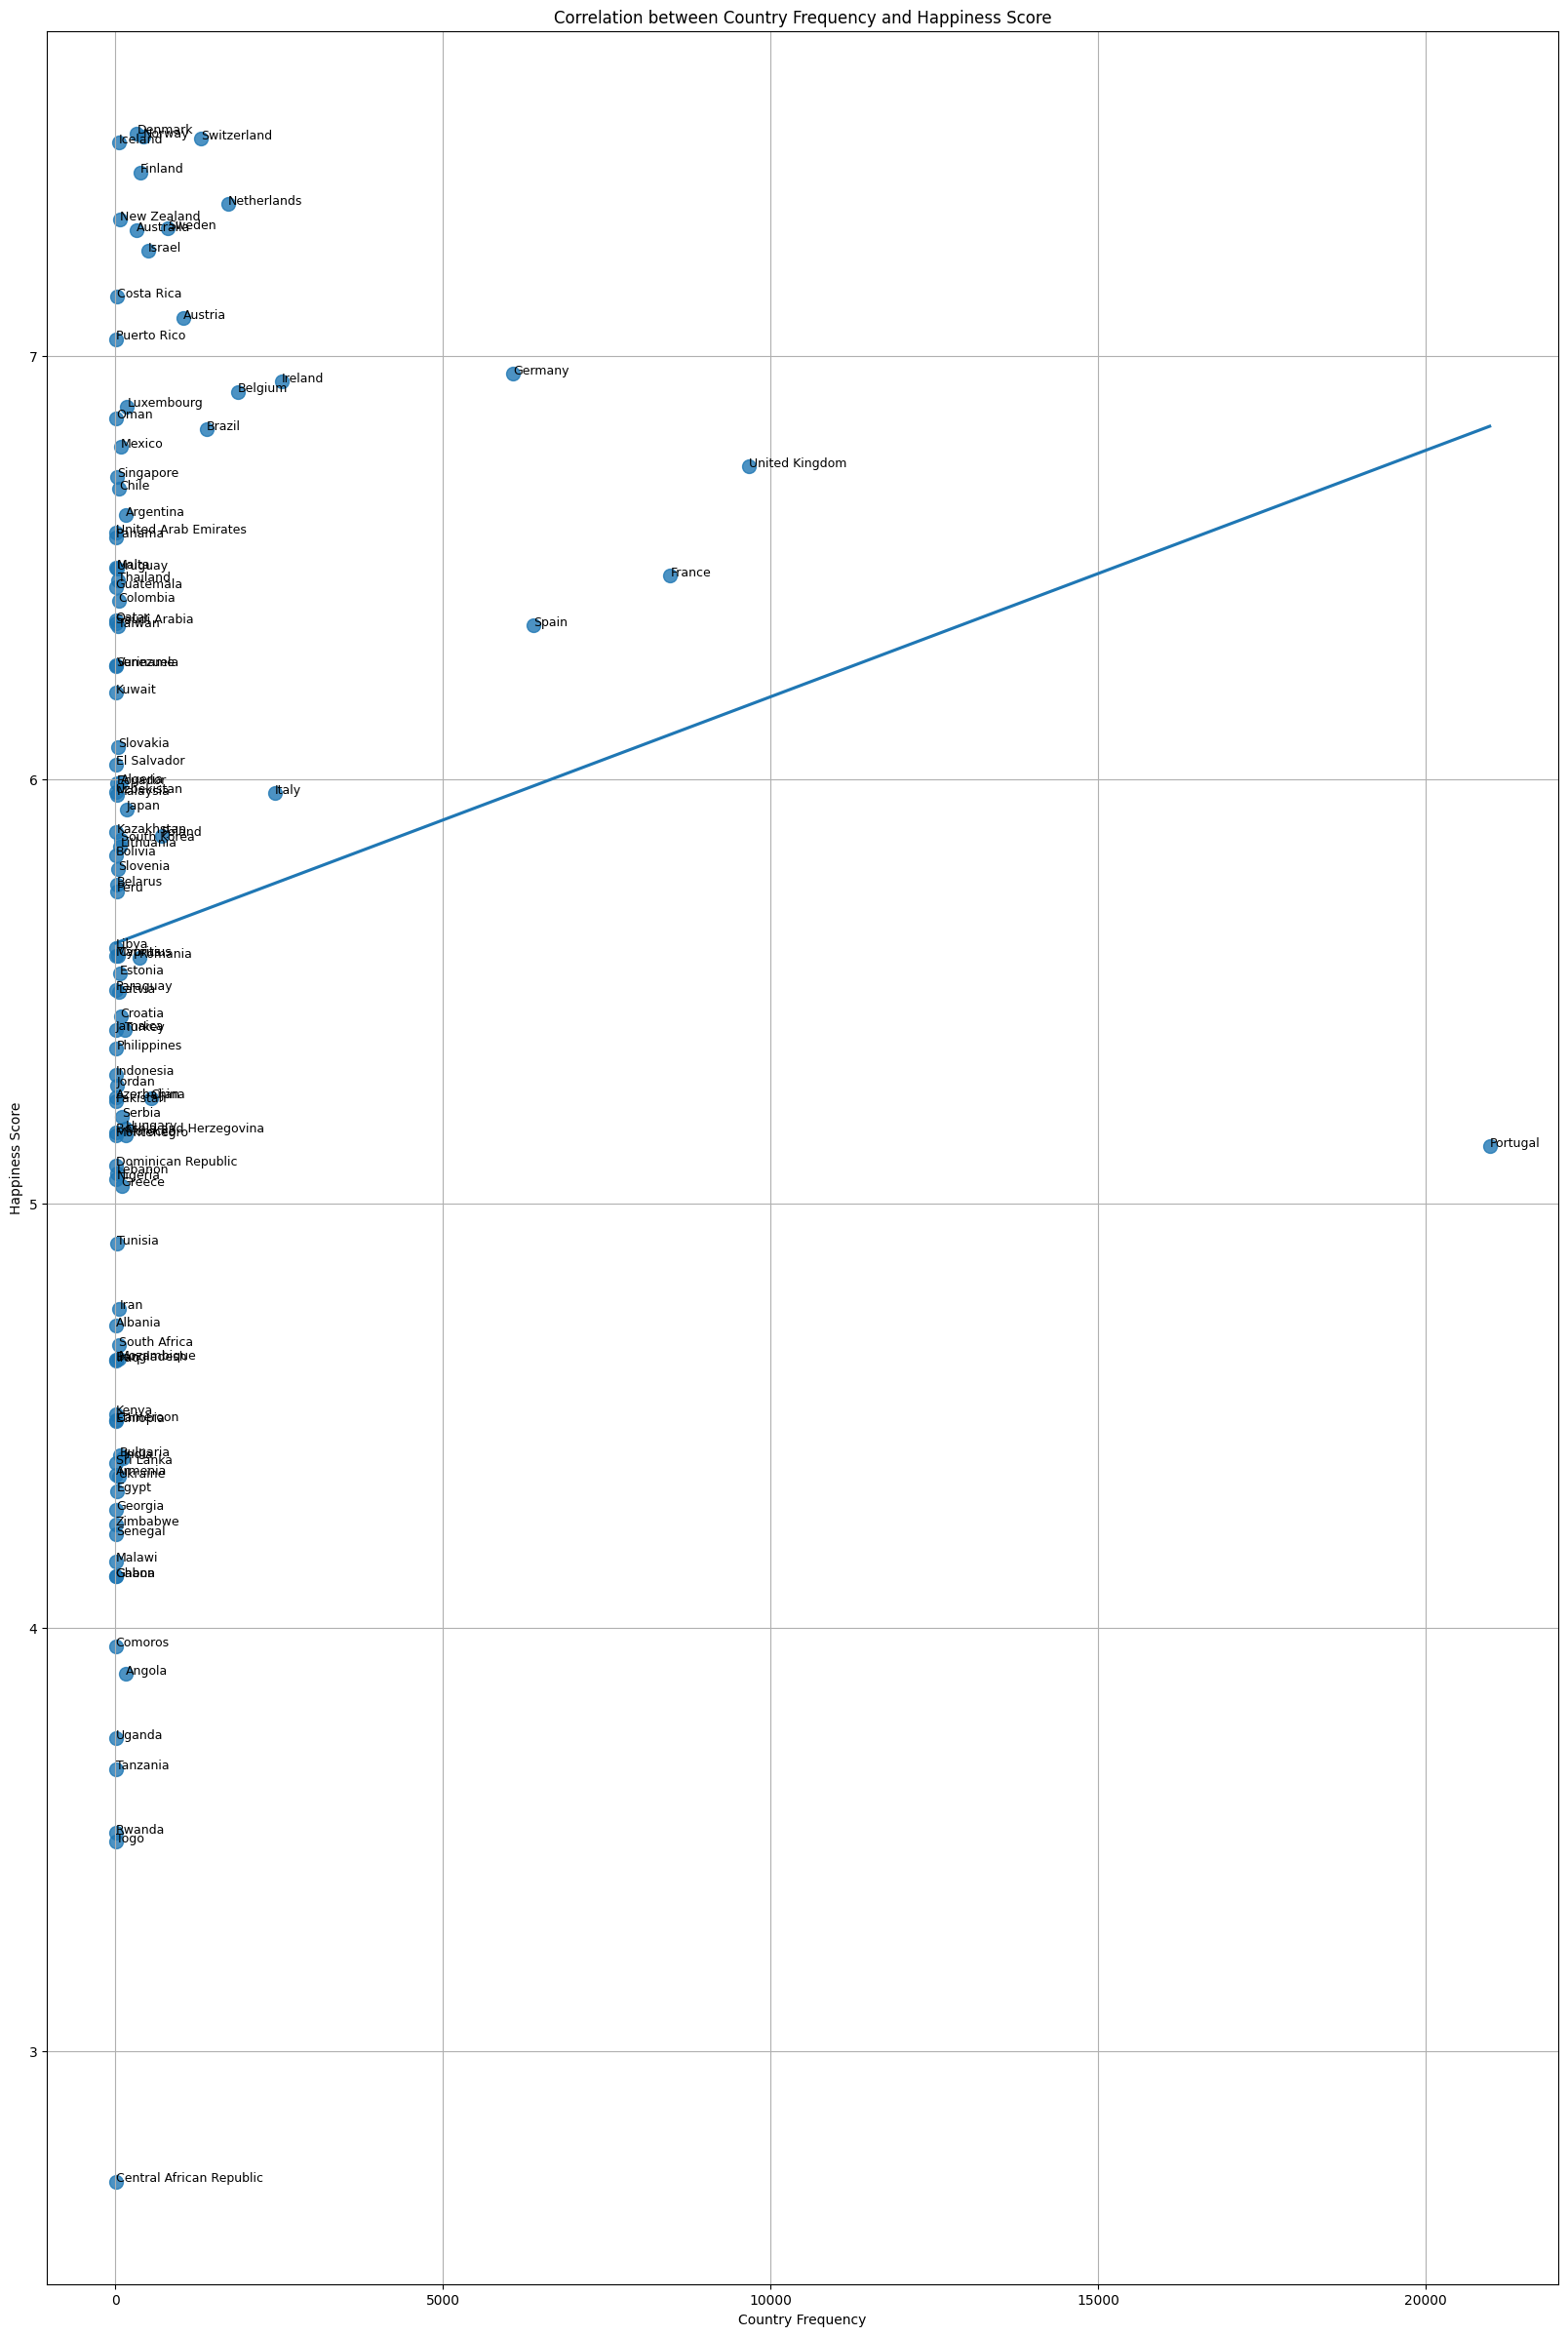

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatterplot mit Trendlinie erstellen
plt.figure(figsize=(20, 30))
sns.regplot(x=sorted_countries_common, y=grouped_scores_common, scatter_kws={"s": 100}, ci=None)
plt.xlabel("Country Frequency")
plt.ylabel("Happiness Score")
plt.title("Correlation between Country Frequency and Happiness Score")
plt.grid(True)

# Punkte beschriften
for i, country in enumerate(common_countries):
    plt.text(sorted_countries_common[i], grouped_scores_common[i], country, fontsize=9)

# Grafik speichern
plt.savefig("Output\Figures\CountryHappinessScatterAll_big.jpg", bbox_inches="tight", dpi=300)

plt.show()

C:\Users\jkr\AppData\Local\Temp\ipykernel_7940\4160312126.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  grouped_scores_common_filtered = [grouped_scores_common[i] for i, country in enumerate(common_countries) if country in common_countries_filtered]


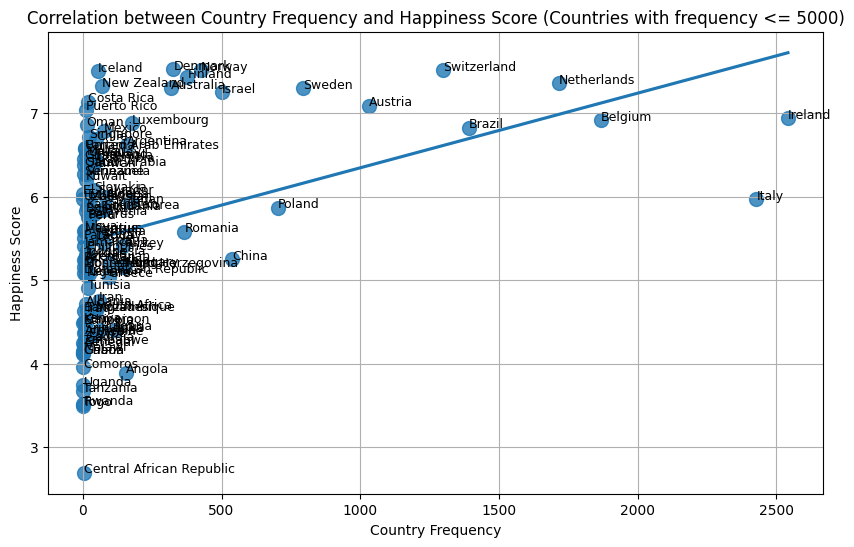

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtern der Länder mit einer Häufigkeit von bis zu 5000
common_countries_filtered = [country for country in common_countries if sorted_countries[country] <= 5000]
sorted_countries_common_filtered = [sorted_countries[country] for country in common_countries_filtered]
grouped_scores_common_filtered = [grouped_scores_common[i] for i, country in enumerate(common_countries) if country in common_countries_filtered]

# Scatterplot mit Trendlinie erstellen
plt.figure(figsize=(10, 6))
sns.regplot(x=sorted_countries_common_filtered, y=grouped_scores_common_filtered, scatter_kws={"s": 100}, ci=None)
plt.xlabel("Country Frequency")
plt.ylabel("Happiness Score")
plt.title("Correlation between Country Frequency and Happiness Score (Countries with frequency <= 5000)")
plt.grid(True)

# Punkte beschriften
for i, country in enumerate(common_countries_filtered):
    plt.text(sorted_countries_common_filtered[i], grouped_scores_common_filtered[i], country, fontsize=9)

plt.show()


C:\Users\jkr\AppData\Local\Temp\ipykernel_7940\390987411.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  grouped_scores_common_filtered = [grouped_scores_common[i] for i, country in enumerate(common_countries) if country in common_countries_filtered]


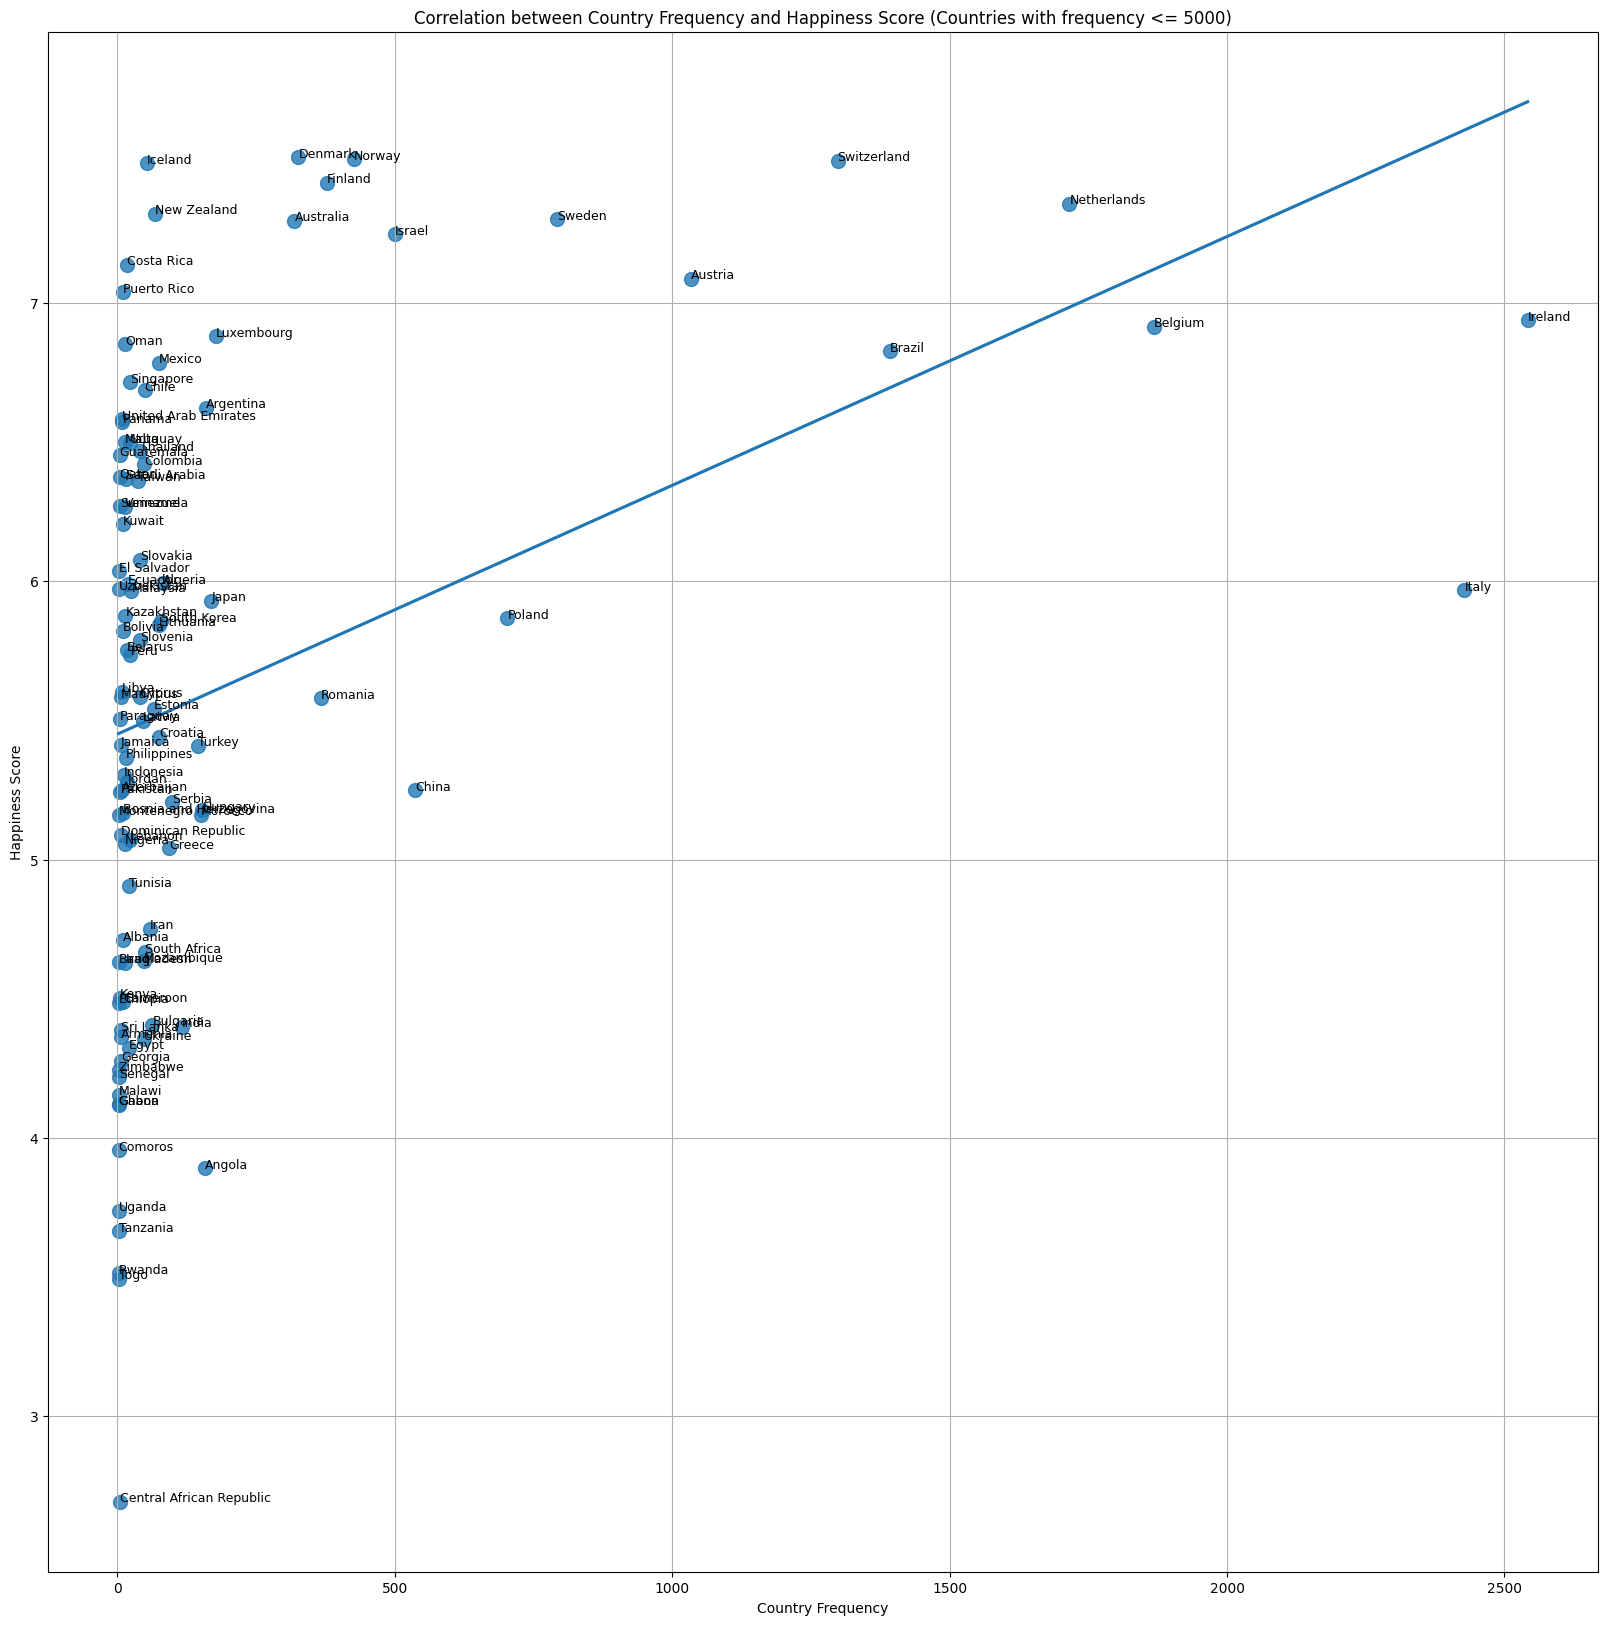

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtern der Länder mit einer Häufigkeit von bis zu 5000
common_countries_filtered = [country for country in common_countries if sorted_countries[country] <= 5000]
sorted_countries_common_filtered = [sorted_countries[country] for country in common_countries_filtered]
grouped_scores_common_filtered = [grouped_scores_common[i] for i, country in enumerate(common_countries) if country in common_countries_filtered]

# Scatterplot mit Trendlinie erstellen
plt.figure(figsize=(20, 20))
sns.regplot(x=sorted_countries_common_filtered, y=grouped_scores_common_filtered, scatter_kws={"s": 100}, ci=None)
plt.xlabel("Country Frequency")
plt.ylabel("Happiness Score")
plt.title("Correlation between Country Frequency and Happiness Score (Countries with frequency <= 5000)")
plt.grid(True)

# Punkte beschriften
for i, country in enumerate(common_countries_filtered):
    plt.text(sorted_countries_common_filtered[i], grouped_scores_common_filtered[i], country, fontsize=9)

# Grafik speichern
plt.savefig("Output\Figures\CountryHappinessScatter5000_big.jpg", bbox_inches="tight", dpi=300)

plt.show()